# Load Data

In [1]:
from recom_system.algorithms.preprocessing import get_ratings_datasets


trainset, testset = get_ratings_datasets(train_size=0.8, drop_zero=True)
print(f'{len(trainset.raw_ratings)=}, {len(testset)=}')


len(trainset.raw_ratings)=311390, len(testset)=51709


# Build Model

In [3]:
from recom_system.algorithms.io import get_books
from recom_system.algorithms.models.hybird.ncf_via_content import NcfViaContent, build_item_matrix


books = get_books()
item_profiles = build_item_matrix(books)

ncfc = NcfViaContent(item_profiles, ncf_params={'mlp_size': [100, 100, 10]})
%time ncfc.fit(trainset.build_full_trainset())

CPU times: user 15.5 s, sys: 20.7 s, total: 36.3 s
Wall time: 12.3 s


In [5]:
import torch

optimizer = torch.optim.Adam(ncfc.ncf.parameters(), lr=1e-3, weight_decay=1e-4)
loss_func = torch.nn.MSELoss()

losses = ncfc.train(optimizer, loss_func, epochs=10)

Text(0, 0.5, 'mse')

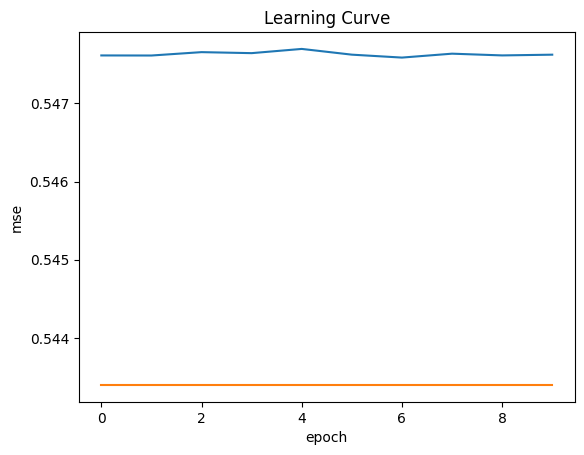

In [6]:
from matplotlib import pyplot as plt

train_loss, test_loss = zip(*losses)
plt.plot(range(len(train_loss)), train_loss, label='train loss')
plt.plot(range(len(test_loss)), test_loss, label='test loss')
plt.title('Learning Curve')
plt.xlabel('epoch')
plt.ylabel('mse')